# Laboratorio 01 - Programación Lineal
## Ejercicio 04

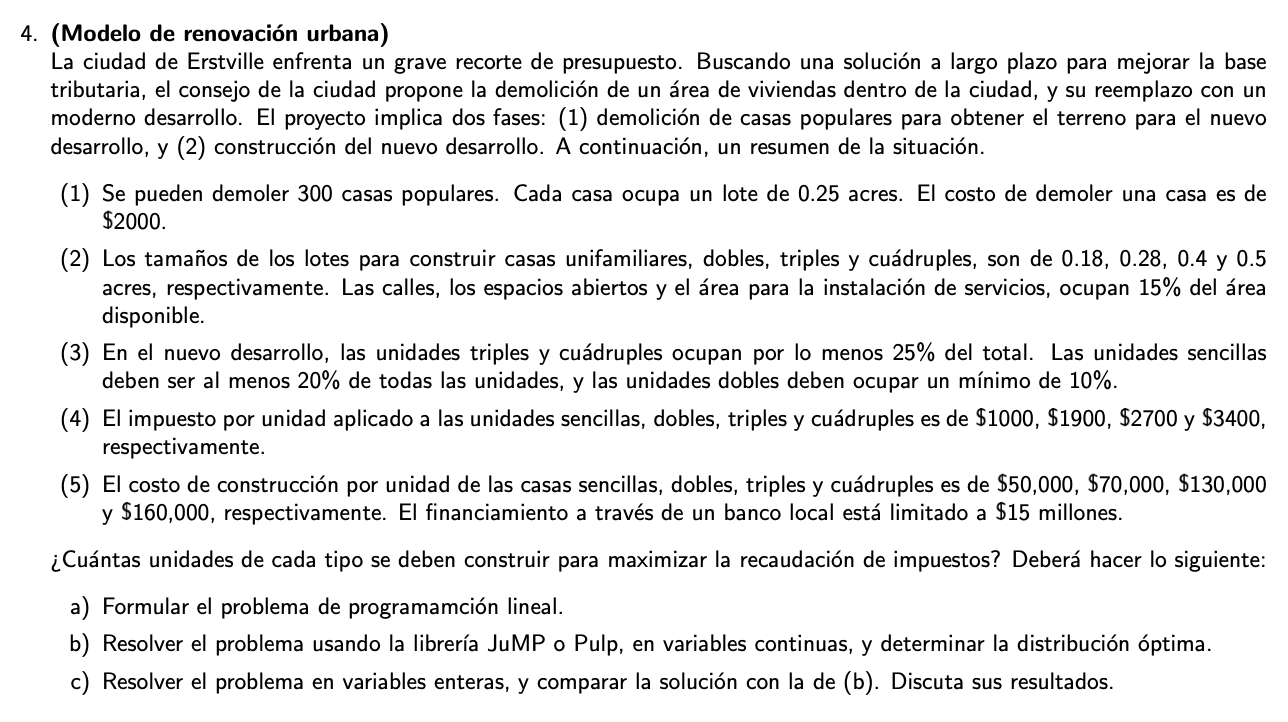

In [1]:
using JuMP
using Ipopt 
using HiGHS 
using Optimization

## Modelo continuo

In [2]:

n_casas = 300
acre_por_casa = 0.25
area_demolicion = n_casas * acre_por_casa           
area_util = 0.85 * area_demolicion                     # 63.75 acres útiles

tamanos_lote    = [0.18, 0.28, 0.40, 0.50]             # acres: [single, double, triple, quadruple]
impuestos_unit = [1000, 1900, 2700, 3400]              # $ por unidad
costos_unit     = [50_000, 70_000, 130_000, 160_000]   # $ construcción por unidad
max_financiamiento = 15e6                              # $15 millones


model_cont = Model(Ipopt.Optimizer)

@variable(model_cont, x[1:4] >= 0)
@objective(model_cont, Max, sum(impuestos_unit[i]*x[i] for i in 1:4))

@constraint(model_cont, sum(tamanos_lote[i]*x[i] for i in 1:4) <= area_util)
@constraint(model_cont, x[3] + x[4] >= 0.25 * sum(x[i] for i in 1:4))  
@constraint(model_cont, x[1]           >= 0.20 * sum(x[i] for i in 1:4)) 
@constraint(model_cont, x[2]           >= 0.10 * sum(x[i] for i in 1:4)) 

@constraint(model_cont, sum(costos_unit[i]*x[i] for i in 1:4) <= max_financiamiento)

optimize!(model_cont)

println("=== Solución continua ===")
for i in 1:4
    println("  x[$i] = ", value(x[i]))
end
println("  Recaudación total = \$", objective_value(model_cont))



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       20
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        4
                     variables with only lower bounds:        4
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

## Modelo Entero

In [ ]:
model_int = Model(HiGHS.Optimizer)

@variable(model_int, xi[1:4] >= 0, Int)
@objective(model_int, Max, sum(impuestos_unit[i]*xi[i] for i in 1:4))

@constraint(model_int, sum(tamanos_lote[i]*xi[i] for i in 1:4) <= area_util)
@constraint(model_int, xi[3] + xi[4] >= 0.25 * sum(xi[i] for i in 1:4))
@constraint(model_int, xi[1]           >= 0.20 * sum(xi[i] for i in 1:4))
@constraint(model_int, xi[2]           >= 0.10 * sum(xi[i] for i in 1:4))
@constraint(model_int, sum(costos_unit[i]*xi[i] for i in 1:4) <= max_financiamiento)

optimize!(model_int)

println("\n=== Solución entera ===")
for i in 1:4
    println("  xi[$i] = ", value(xi[i]))
end
println("  Recaudación total = \$", objective_value(model_int))

Running HiGHS 1.11.0 (git hash: 364c83a51e): Copyright (c) 2025 HiGHS under MIT licence terms
MIP  has 5 rows; 4 cols; 20 nonzeros; 4 integer variables (0 binary)
Coefficient ranges:
  Matrix [1e-01, 2e+05]
  Cost   [1e+03, 3e+03]
  Bound  [0e+00, 0e+00]
  RHS    [6e+01, 2e+07]
Presolving model
5 rows, 4 cols, 20 nonzeros  0s
5 rows, 4 cols, 20 nonzeros  0s
Objective function is integral with scale 0.01

Solving MIP model with:
   5 rows
   4 cols (0 binary, 4 integer, 0 implied int., 0 continuous, 0 domain fixed)
   20 nonzeros

Src: B => Branching; C => Central rounding; F => Feasibility pump; J => Feasibility jump;
     H => Heuristic; L => Sub-MIP; P => Empty MIP; R => Randomized rounding; Z => ZI Round;
     I => Shifting; S => Solve LP; T => Evaluate node; U => Unbounded; X => User solution;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |   